In [10]:
# importing libraries
import os  # Operating system module for interacting with the file system
import cv2  # OpenCV module for image processing
import numpy as np  # NumPy module for numerical operations
import matplotlib.pyplot as plt  # Matplotlib module for data visualization
from sklearn.model_selection import train_test_split  # Function for splitting data into training and testing sets
import tensorflow as tf  # TensorFlow module for deep learning
from keras.utils import to_categorical  # Function for one-hot encoding of labels
from keras.preprocessing.image import ImageDataGenerator  # Class for data augmentation of images
from keras.optimizers import Adam  # Optimizer for model training
from sklearn.metrics import confusion_matrix  # Function for evaluating model performance using confusion matrix
from sklearn.utils.multiclass import unique_labels  # Function for generating unique class labels

In [11]:
# Mount drive first and proceed
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [13]:
print(os.listdir('/content/gdrive/MyDrive/Project 4/Combined flowers'))

['daffodil', 'orchid', 'tulip', 'hydrangea', 'hibiscus', 'rose', 'dahlia', 'foxglove', 'sunflower', 'bougainvillea']


In [16]:
# Specifying the path to the dataset folder
flowers = '/content/gdrive/MyDrive/Project 4/Combined flowers'
images=[]
labels=[]

In [17]:
# Iterate through the subfolders in the dataset folder
for subfolder in os.listdir(flowers):
    subfolder_path = os.path.join(flowers, subfolder)
    if os.path.isdir(subfolder_path):
        # Get the label from the subfolder name
        label = subfolder

        # Iterate through the image files in the subfolder
        for image_file in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, image_file)

            # Read the image using OpenCV
            image = cv2.imread(image_path)

            # Perform any necessary preprocessing on the image

            # Resize the image to a fixed size (e.g., 64x64)
            image = cv2.resize(image, (150, 150))

            # Normalize pixel values to the range of 0 to 1
            image = image.astype('float32') / 255.0

            # Append the image and label to the lists
            images.append(image)
            labels.append(label)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

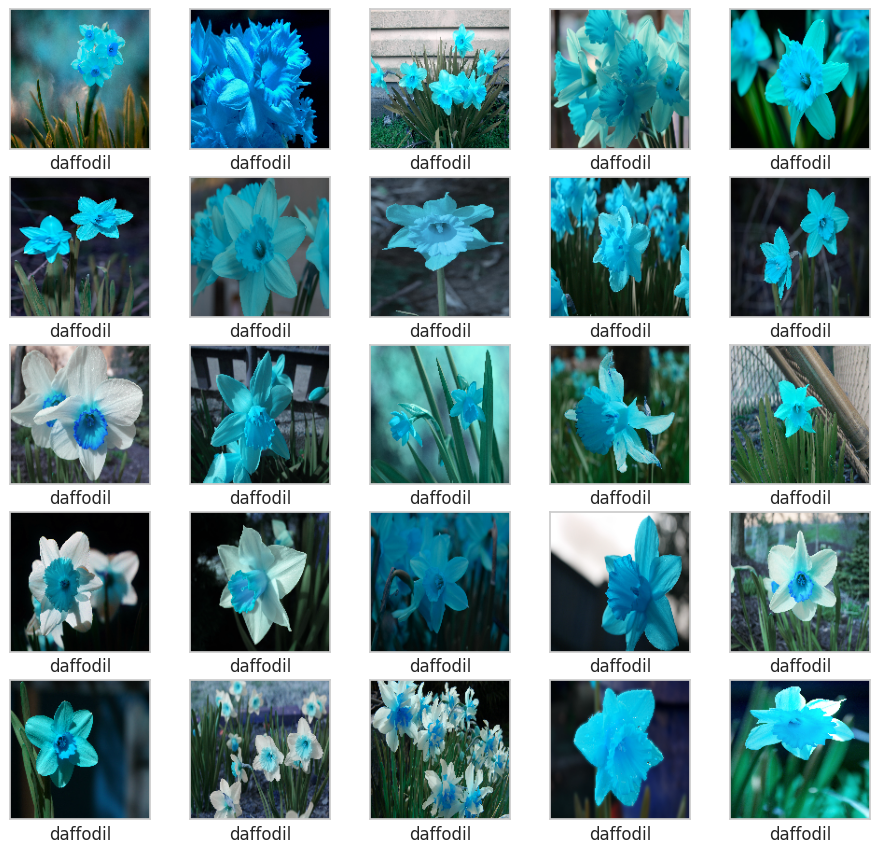

In [18]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[i])
plt.show()

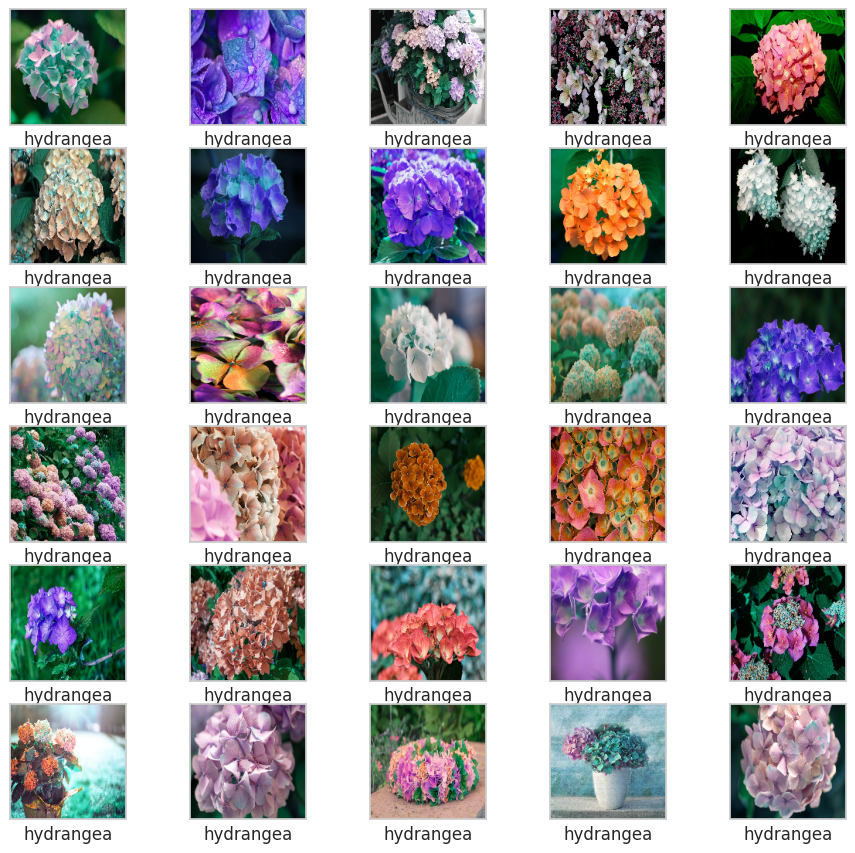

In [19]:
plt.figure(figsize=(10, 10))
for i in range(1001, 1031):
    plt.subplot(6, 5, i-1000)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[i])
plt.show()

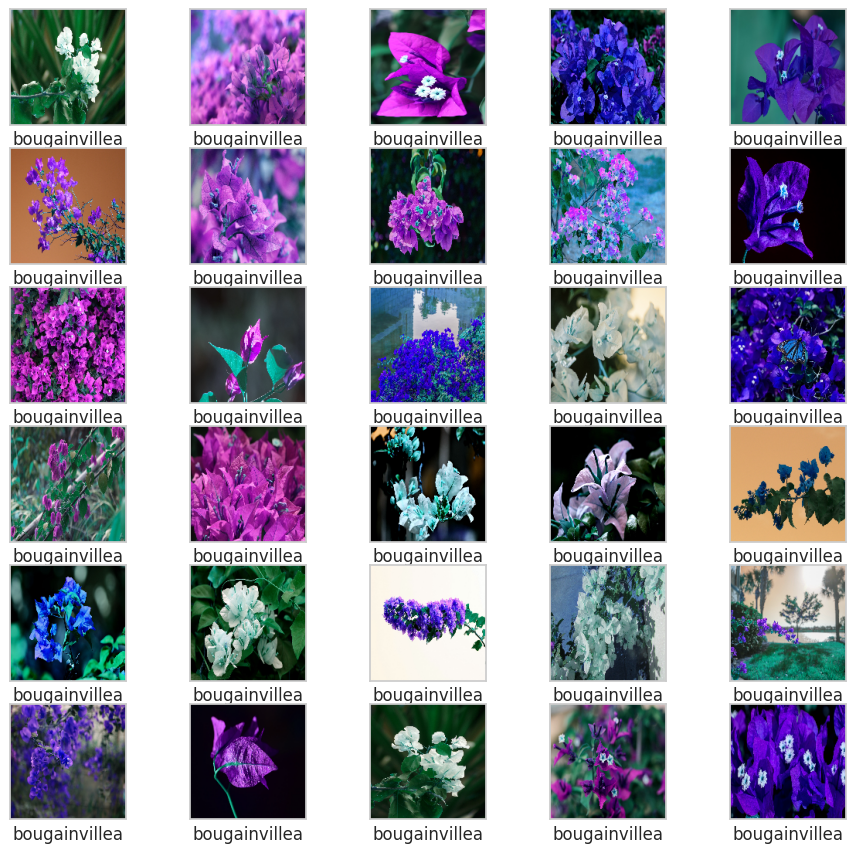

In [20]:
plt.figure(figsize=(10, 10))
for i in range(3001, 3031):
    plt.subplot(6, 5, i-3000)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[i])
plt.show()

In [21]:
# Convert labels to integers
label_to_index = {label: i for i, label in enumerate(np.unique(labels))}
labels = np.array([label_to_index[label] for label in labels])

# Perform one-hot encoding on the labels
num_classes = len(np.unique(labels))
labels = to_categorical(labels, num_classes=num_classes)

In [22]:
print(images.shape)
print(labels.shape)

(3129, 150, 150, 3)
(3129, 10)


In [23]:
# Split the data into training and testing sets

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Print the shape of the arrays to verify the loading process
print("Train Images shape:", train_images.shape)
print("Train Labels shape:", train_labels.shape)
print("Test Images shape:", test_images.shape)
print("Test Labels shape:", test_labels.shape)

Train Images shape: (2503, 150, 150, 3)
Train Labels shape: (2503, 10)
Test Images shape: (626, 150, 150, 3)
Test Labels shape: (626, 10)


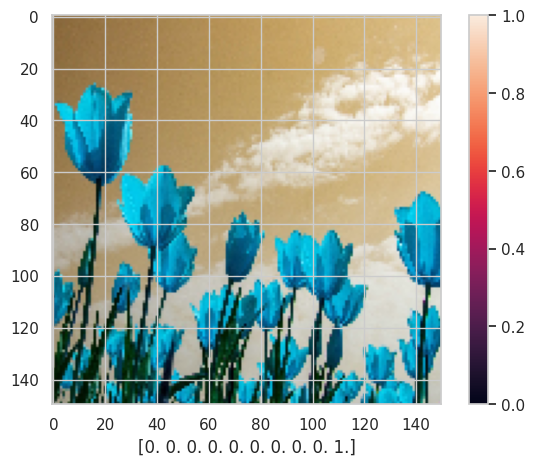

In [24]:
plt.imshow(train_images[101])
plt.xlabel(train_labels[101])
plt.colorbar()

In [25]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [26]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(150, 150,3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])

In [27]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [28]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [31]:
#Train the model
batch_size = 32
epochs = 20

history = model.fit_generator(
    datagen.flow(train_images, train_labels, batch_size=batch_size),
    steps_per_epoch=len(train_images) // batch_size,
    epochs=epochs,
    validation_data=(test_images, test_labels))

Epoch 1/20


InvalidArgumentError: ignored